# Introduction to network analysis

The aim of these 2 classes is to present some notions and concepts of complex network theory that could be used during the course of the master and even after.
During the lectures we alternate between theroetical definitions of several measures and how to practically estimate them using python function. 
To this end, before starting, some Python packages need to be installed:
    1. networkx: this package contains the functions to handle network objects and estimate network measures
    2. matplotlib: this package contains function for plotting results
    3. scipy and numpy: that contains  mathematical functions 
    4. pandas: to use and transform dataset

The command to import the packages are shown below

In [1]:
import networkx as nx
import matplotlib.pyplot as pl
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns

The plan of the two days is shown below:

    First Day - Notations and definition
    - Example of real life complex network and definition
    - Centrality measures
    - Global measures
    
    Second Day -Complex network's properties
    - Feedback on assignments
    - The importance of degree distribution
    - Modeling networks and the small world effect
    - Cohesiveness and resilience of a network
    - Community detection
 
For most of the course we use a couple of toy networks (files toy_network_1.csv and toy_network_2.csv)  . They are small compared to real world ones but they provide a  way to introduce concepts.
    
This course is a very short introduction to complex network theory and it hasn't any presumption to be exhaustive. If you are interested in the topic and would like to  go more in detail in some points you could read the book by (Menczer et al.) [https://www.cambridge.org/fr/academic/subjects/physics/statistical-physics/first-course-network-science] and by (Barabasi)[http://networksciencebook.com/] available online 

Most of the images shown in this course, the nicest ones , are taken from these books.

# First Day

## Example of real life complex network and  some definitions

Nowadays network are present in many aspects of our daily life. Examples of common networks are facebook, instagram  twitter, the world wide web and internet itself :

    - Facebook individuals are connected by a link of mutual friendship. Through this link  information can be exchanged and new acquaintances can be introduced
    - Instagram/Twitter's users interact through following other users or retweeting their messages
    - Internet is a network of computers and servers connected among them. Through their connections information can be exchanged
    - World Wide Web is a set of webpages with (hyper)links pointing among them. From one page you can jump to another one
    
 Other examples of networks include:
 
     - Transportation network: Cities are connected through the flights connecting airports. The intensity of movements to and from airports helps identifiyng those who are important. Think about the difference between Paris Charles de Gaulle , New York JFK and Montpellier
     - Sexual relation  network: often built  using snowball sampling, starting from one patient identify people with whom he/she has sexual intercourses , and then questioning them. This type of network is important to study the diffusion of sexually transmitted diseases like chlamydia, HIV and Hepatitis
  
 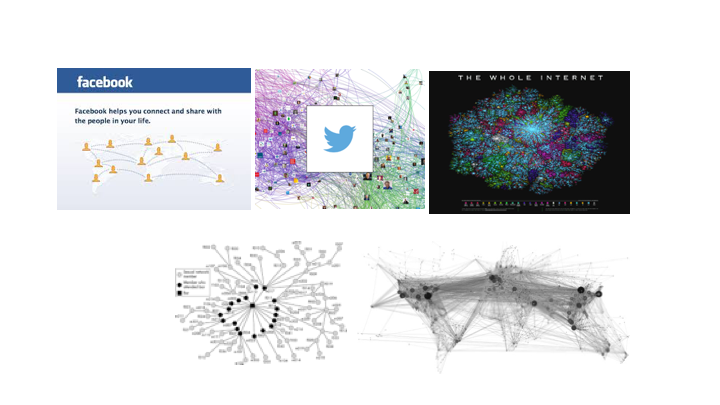

Biological networks include:
    
    - Gene regulatory network: in this case  genes , input and output are in relation among them due to the action that one element applies to the other ( blocking, catalysing etc...) that could result to the activation of specific gene
    -Protein network : similarly  describe the interaction among proteins in regulating the activities of enzymes
    -Neuron networks: synapses are connected among them and thorugh them electrical signals are transmitted
    -Ecological network: identifying the relation among predators and preys in a specific ecosystem
  
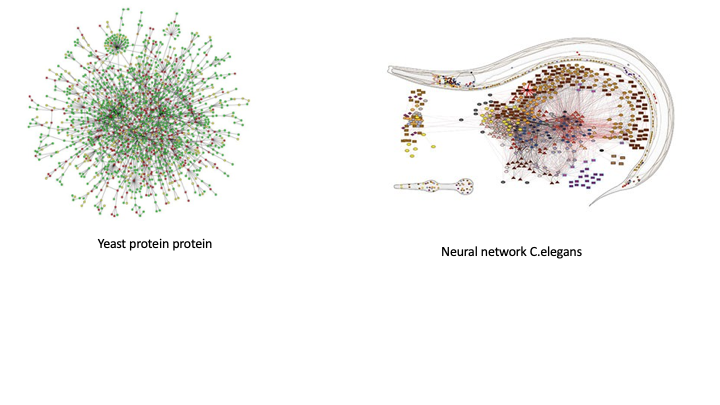   

Definiton of a Network: __Representation of an interacting system in terms of nodes (interacting entities) and links connecing 2 nodes (indicating if a relation exists between 2 entities)__

  - __Node__: point in a network  at which lines intersect . To each link is associated an identifiant (a letter , a number) to identify in the network. It corresponds to the interacting units. Besides structural properties  nodes can have other characteristics (i.e. city name, population , age, sex, gene type)
  - __Link__: rod connecting 2 nodes. It indicates the presence of an interaction between 2 nodes. Its identifiant is given by hte identifiant of its ends'nodes (i,j). As in the case of nodes, other characteristics of the link can be considered (weight, type of interaction, period etc..)
  - __Neighbor__: 2 nodes at the ends of the same link (directly connected). 

Through the network several  phenomena can take place and properties/information/pathogens  can flow. Through the simplification of the complex system the  interest is put on the structure of the network and how this can influence or can  be influenced by the dynamic over it.

The science that has as object of study the analysis of network is  *Complex Network theory* whose tools have been mutuated from differnt research fields. Although the concept of network was initially developed in the context of sociology, the  field of research involved different type of networks defined by the type of interaction

|Type | Example | Objective|Node| Link|
|---| --- | ---| ---|---|
|Social | Facebook, Family| Friendship, family  | Individuals| Friendship, Family relation. Links are reciprocal|
|Communication | Instgram, Twitter| Spread information at large scale  |User|Retweet. Links can be undirected|
|Transportation | Airports,urban map| Flows of individuals, goods |Cities,countries|Flows due to flights Links are characterized by the volume of animals|
|Biological | Genetic Regulatory network| How  cells/genes interact|Genes, proteins|Interaction spiking. Boolean: the activation depends on state of other components|


According to the characteristics of its links, a network can be described as directed/oriented or undirected, weighted or unweighted. 
In an undirected network, the presence of a link between two nodes means that they are connected in both directions, whereas the presence of a link in a directed network does not necessarily imply the presence of a link in the opposite direction (Menczer et al. 2020). From an epidemiological point of view, this difference has important implications for the spread of diseases. A disease that in an undirected network might spread to all nodes, in the same directed network might stop before reaching all of them because there are no connections in the "right direction". 

Furthermore, some types of networks can be characterised by weights associated with their own links and are referred as weighted networks (Menczer et al. 2020). In livestock mobility networks, for example, the volume of animals moved can be seen as the weight associated with the trade link between origin and destination. This too can influence the spread of diseases because the greater the weight, and hence the volume of the herd, the greater the risk of presence of sick animals.
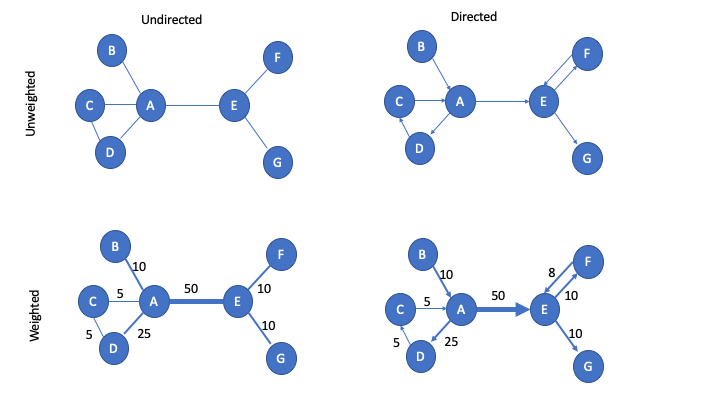

Sometimes the nodes of the same networks can interact in different ways (p.e. cities can be connected by different airlines) in this case we talk about _multiplex_ 

### Network's representation

Network data are usually collected through the use of surveys and could include hundreds  if not thousands of nodes and even more links. Because of this the graphical represntation sometimes is not very informative. Depending on the context network can be represented in different forms:
    - Matrix form: a square matrix (N X N) whose size corresponds to the number of nodes, with 1 if there is a link between two  nodes, 0 otherwise. In case of weighted network the entries ae number whose values correspond to the weight of the link. From a theoretical point of view is the most effective way of representing , but not in terms of storage (a lot of 0)
    - Nodelist: for each node a list of all the neighbors
    - Edgelist: a table  where each line correspond to a link
    
 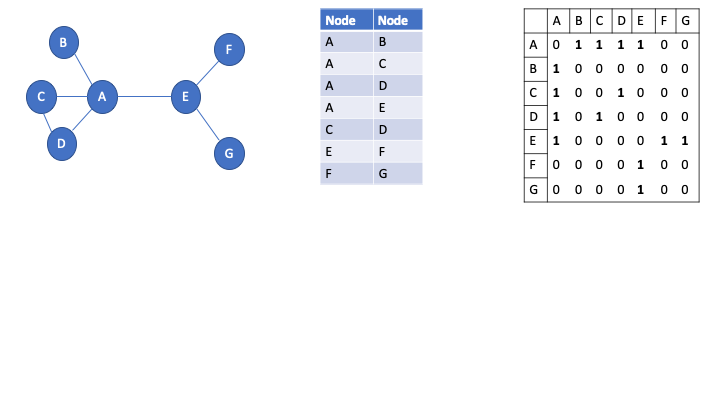   
 
 In our case the  network data are in the form of an edgelist. In the following we show how data can be imported using networkx

### Importing network data in python

 -) Importing as a undirected network. We create an object Graph, through the function __nx.Graph__.

In [2]:
df = pd.read_csv("toy_network_1.csv",sep=";")
Graphtype = nx.Graph()
Gund = nx.from_pandas_edgelist(df,source="Origin",target="Destination",edge_attr=None,  create_using=Graphtype)

And we plot

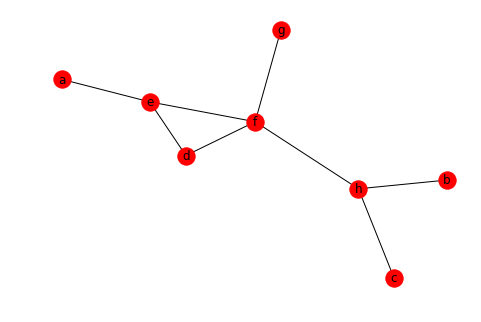

In [3]:
nx.draw(Gund,with_labels=True)

-) as a direct graph. We create a direct graph using the function __nx.Digraph__. Source and target identify the columns to consider as tail and the head of the arrows

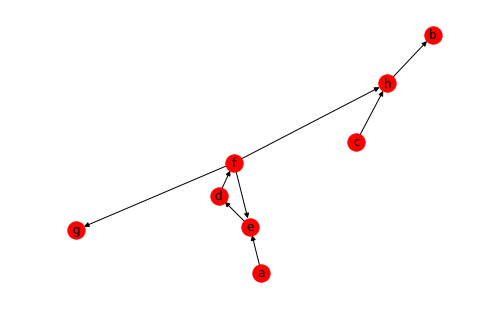

In [4]:
Graphtypedir = nx.DiGraph()
Gdir = nx.from_pandas_edgelist(df,source="Origin",target="Destination",edge_attr=None,  create_using=Graphtypedir)
nx.draw(Gdir,with_labels=True)

-) And as a direct weighted network. In this case we need to  indicate the  weights column

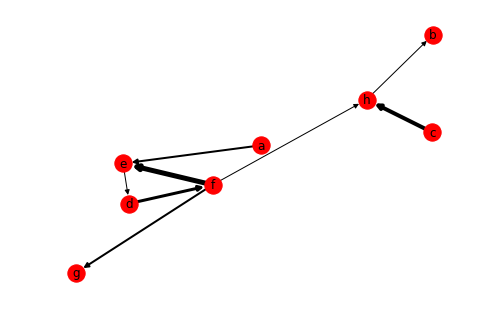

In [5]:
Gdirw = nx.from_pandas_edgelist(df,source="Origin",target="Destination",edge_attr="Weight",  create_using=Graphtypedir)
weights = nx.get_edge_attributes(Gdirw,'Weight').values()
nx.draw(Gdirw,with_labels=True,width=weights)

In the case of small networks, few nodes and links, the representation fo a network is quite easy. However the complexity of representation quickly increases  with the number of nodes and, most importantly, links.Depicting network is beyond the scope of this course. Ad-hoc software have been developed to display network. We reccommend to have a look at the [Gephi software](https://gephi.org/). 

# Network measures

Network measures are used to define structural properties , classify nodes in the network, but also to compare  different networks. 
We can classify the measures in 2 broad categories:

    - Centrality measures: defined for each node 
    - Global measures:  global structural property of the network in its completeness

In the following we consider an undirected , unweighted network although the definition for the centrality measures can be easily extended to oriented and weighted network. When needed we'll discuss the correspective  wieghted  and oriented counterparts.

In the following we indicate with :

   - __Size__ (N) of a network , the number of nodes in a network 
   - __Number of links__ (L) of a network, the total number of links present in a network. The function for estimating __L__  is  number_of_edges()
    

In [6]:
Gund.number_of_edges()

8

## Centrality Measures

Centrality measures are used to quantify the importance of nodes and/or links in a network  with respect a specific characteristic. 
    Among them, the most common are the degree,the clustering coefficient, the betweenness, the closeness and eigenvalue centrality. A modification of the definition of eigenvalue centrality , it has actually used to develop the PageRank algorithm and used in the Google search engine.

### Degree

Degree: the degree $k_i$ of a node $i$ is defined as the number of links connecting it to other nodes or , alternatively , the number of neighbors a node has. When a network is directed, we call in-degree $k_i^{in}$ the links pointing at $i$ and out-degree $k_i^{out}$ the links originating from i. A node with degree null is called a _singleton_. On the other hand, high-degree nodes are called _hubs_ and their role is of utterly importance depending on the  structure of the network.
Networkx allows to estimate the degree (in and out) for a specific node or for all nodes through the function degree whose syntax is shown below

For a node "f" in a undirected network

In [7]:
Gund.degree("f")

4

For all nodes in an undirect network 

In [8]:
Gund.degree()

DegreeView({'a': 1, 'c': 1, 'b': 1, 'e': 3, 'd': 2, 'g': 1, 'f': 4, 'h': 3})

Similarly in an oriented network we can estimate the in and out degree as 

In [9]:
Gdir.in_degree()

InDegreeView({'a': 0, 'c': 0, 'b': 1, 'e': 2, 'd': 1, 'g': 1, 'f': 1, 'h': 2})

In [10]:
Gdir.out_degree()

OutDegreeView({'a': 1, 'c': 1, 'b': 0, 'e': 1, 'd': 1, 'g': 0, 'f': 3, 'h': 1})

The average (in/out) degree of a node is estimated summing over all nodes' degree  in the network and dividing by the size of the network

$<k>=\frac{\sum_i k_i}{N}$


We can immagine each node as a "star" with the number of arms equals to the degree (stubs). Thus a link is formed when 2 stubs join together. The total number of link $L$ 
is related to the the average degree by the relation

$L=\frac{\sum_i k_i}{2}=N\frac{<k>}{2}$

In the case of oriented network the above relation becomes:

$L=\sum_i k_i^{in}=N<k^{in}>=N<k^{out}>=$

This will become important when considering the connectivity properties of the network

### Strength
An extension  of the degree definition in the case of a weighted  network is the strenght. Indicating with $w_{ij}$ the weight of the link $(i,j)$  the  strength of a node $i$ is obtained  summing all the weights of the links $i$ is part of

$s_i=\sum_j w_{ij}$ 

where the sum is extended to all the $i$'s neighbors
In networkx to estimate the strength for a specific node or all the network , and also for incoming and out going links, we use the function degree with the option weight

In [45]:
Gdirw.degree(weight="Weight")

DiDegreeView({'a': 2, 'c': 4, 'b': 2, 'e': 8, 'd': 2, 'g': 3, 'f': 10, 'h': 7})

In [46]:
Gdirw.in_degree(weight="Weight")

InDegreeView({'a': 0, 'c': 0, 'b': 2, 'e': 7, 'd': 1, 'g': 3, 'f': 1, 'h': 5})

### Clustering coefficient

In real-world social network, it is common that 2 friends of a person are also friends (or at least they know each other). In network analysis we distinguish between _triads_, i.e; a set of 3 nodes   connected by 2 links, and _triangles_, a set of 3 nodes completely connected. The  clustering coefficient evaluates how well connected are my friends and how many traingles are present over all the possible triangles: is the fraction of pairs of node's neighbors , that are actually connected to each other. This coefficient is estimated only for those nodes that have more than one neighbor (otherwise has no meaning). Given a node $i$ of degree $k_i$ the coefficient can be estimated as the fraction of links present among the neighors (that complete the  triangles $i$ is a vertex of, $\tau(i)$) over all possible connections among its $k_i$ neighbours $\frac{k_i(k_i-1)}{2}$ :

$C(i)=\frac{2\tau(i)}{k_i(k_i-1)}$

A high value of $C(i)$ indicates there are a lot of triangles in the netowrk , and nodes are clustered. This happens when individuals shared  common elements (_homophily_). On the other hand , the fact of being surrounded by nodes with similar characteristics , could bring nodes to become more similar (_social influence_)

The networkx function to estimate the clustering coefficient is __nx.clustering__

In [11]:
nx.clustering(Gund)

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 1.0,
 'e': 0.3333333333333333,
 'f': 0.16666666666666666,
 'g': 0,
 'h': 0}

In the case of oriented network all the possible orientation should be taken in account , and the number of possible triangle is $k_i(k_i-1)$, thus halving the coefficient.

In [12]:
nx.clustering(Gdir)

{'a': 0,
 'b': 0,
 'c': 0,
 'd': 0.5,
 'e': 0.16666666666666666,
 'f': 0.08333333333333333,
 'g': 0,
 'h': 0}

A network , for whom the clustering coeffecient of each node is identically 0 , is called a __tree__. In this case, if we cut  one of the links the network remains automatically disconnected in 2 parts.

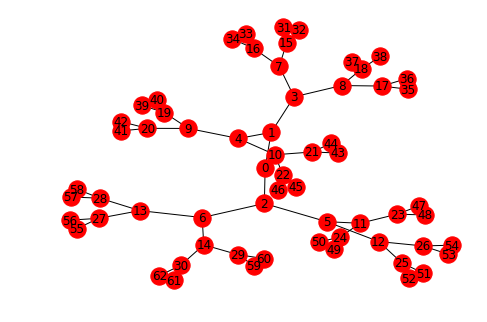

In [13]:
tree=nx.generators.balanced_tree(2, 5)
nx.draw(tree,with_labels=True)

### Interlude: the definition of path and distance over network

The definition of degree, strength and clustering coefficient are definitions that are really local , that are focused only on the node  and its neighbourhood. However, other measures have been developed to take account of the position of the node in the network , i.e. account of the centrality of the node. Before introducing  these measures we need to define what is a path and the distance over a network. On a network there is not the same notion of a distance as in euclidean  space: points that are geograhically closed are not supposed to be also "network -closed". Take the example of the airport network: to go from Montpellier to Rome , a traveler should go first to Paris and then fly to Rome , despite the fact that Rome is closer to Montpellier than Paris , there is no direct flight between the two locations.

- __Path__ Within a network, the path connecting two nodes is defined as the sequence of links traversed to connect them, without crossing the same link twice (unique links). In the case of oriented network, the paths should consider also the orientation of the link.



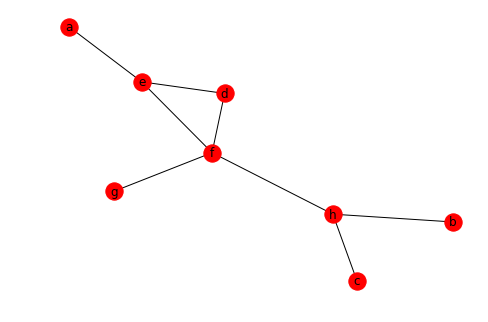

In [14]:
nx.draw(Gund,with_labels=True)

In the figure above 2 possible paths connect the nodes  $a,c$:
    1. (a-e)(e-f)(f-h)(h-c)
    2. (a-e)(e-d)(d-f)(f-h)(h-c)

The two paths are similar , however the second one has an extra link compared to the first one. 

#### Length of a path and distance

 __Length__ We indicate as length of the path the number of links crossed to connect 2 points.

 __(geodesic) distance__ between 2 nodes : the length of the shortest paths connecting the 2 points.
 
 In case there isn't any path connecting 2 nodes the distance is assumed Infinite. This could happen in the case of directed network , when there is no path connecting the 2 following the direction of links


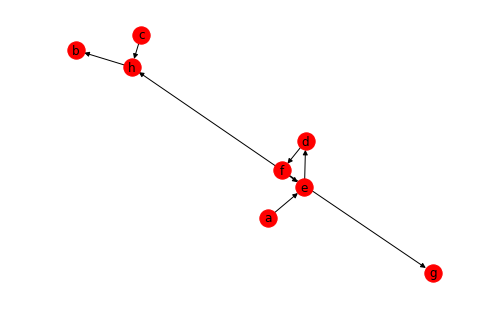

In [15]:
nx.draw(Gdir,with_labels=True)

In this second case the direction of link (c,h) is in opposite way and so there is no path connecting $a,c$

The networkx function for assessing the existence of path connecting nodes and the shortest distance are:

In [16]:
nx.has_path(Gund,'a','c')


True

In [17]:
nx.shortest_path(Gund,'a','c')

['a', 'e', 'f', 'h', 'c']

In [18]:
nx.shortest_path_length(Gund,'a','c')

4

In [19]:
nx.has_path(Gdir,'a','c')

False

In [20]:
nx.shortest_path_length(Gdir,'a','c')

NetworkXNoPath: No path between a and c.

Finding the shortest path among nodes for large network is time consuming and algorithm should be put in place. The basic algorithm is _breadth first_. 
Starting from a source node $s$

    - The neighbors are investigated and given distance 1 and put at layer 1. If 2 nodes are in layer1 they will not investigated again. 
    - The neighbors of nodes in the first layer that are not neighbors among them (i;e. does'nt not exist a link by 2 nodes in the same layer) are investigated and distance  2 is given to each node  and put in layer 2. If 2 nodes in layer2 are connected  they will not investigated again. 
    -The operation is repeated till all the nodes  are in  layers, or there are no more nodes to investigate.
    
 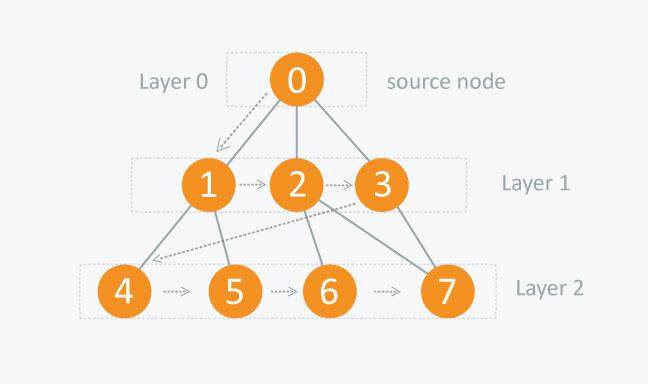

### Betweenness

This measure is defined as the number of times a node acts as a waypoint along the shortest path between two other nodes. Considering $\sigma_{hj}$ as the total number of shortest paths between nodes $h$ and $j$ and $\sigma_{hj}(i)$  as the number of such paths passing through node $i$, the betweenness (b) of $i$ is calculated as  the fraction of paths that pass by $i$,

$b_i=\sum_{h \neq i \neq j}\frac{\sigma_{hj}(i)}{\sigma_{hj}}$

where the sum is done for each pair of distinct nodes $h$ and $j$, different from $i$ . The higher the betweenness the higher is the involvement of the nodes in diffusion processes, the higher is the control on diffusion.
In an animal mobility network, the higher the number, the more movements will pass through the node and the higher its betweenness. In an epidemiological context, the most central nodes should be taken into consideration in surveillance systems, because of their higher risk of being infected by a disease and transmitting it (Menczer et al. 2020). 
Sometimes the betweenness is normalized to the maximum number of paths that could pass through a node 

$\frac{(N-2)(N-1)}{2}$

The function to estimate the betweenness is nx.betweenness_centrality

In [21]:
nx.betweenness_centrality(Gund)

{'a': 0.0,
 'b': 0.0,
 'c': 0.0,
 'd': 0.0,
 'e': 0.2857142857142857,
 'f': 0.7142857142857142,
 'g': 0.0,
 'h': 0.5238095238095237}

As we can see in our example the node $f$ , which has the highest degree has also the highest betweenness.In general there is a strong correlation between  degree and betweennes , the higher the former , the higher the latter. However there are some cases where network is  fomed by thightly knitted sub-networks , linked by the connections of a node. In this case the node has the highest centrality

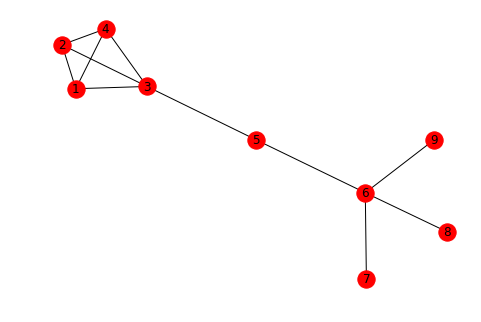

In [22]:
Gbet=nx.Graph()
Gbet.add_edges_from([(1,2),(3,4),(1,3),(1,4),(2,4),(2,3),(3,5),(5,6),(6,7),(6,8),(6,9)])
nx.draw(Gbet,with_labels=True)


In [23]:
nx.betweenness_centrality(Gbet)

{1: 0.0,
 2: 0.0,
 3: 0.5357142857142857,
 4: 0.0,
 5: 0.5714285714285714,
 6: 0.6428571428571428,
 7: 0.0,
 8: 0.0,
 9: 0.0}

The definition of betweenness can be extended to the links, considering the number of paths the link is part of. In this case the function is nx.edge_betweenness_centrality

In [24]:
nx.edge_betweenness_centrality(Gbet)

{(1, 2): 0.027777777777777776,
 (1, 3): 0.16666666666666666,
 (1, 4): 0.027777777777777776,
 (2, 3): 0.16666666666666666,
 (2, 4): 0.027777777777777776,
 (3, 4): 0.16666666666666666,
 (3, 5): 0.5555555555555556,
 (5, 6): 0.5555555555555556,
 (6, 7): 0.2222222222222222,
 (6, 8): 0.2222222222222222,
 (6, 9): 0.2222222222222222}

In most of the cases,  diffusion processes don't take the shortest path . The definition of betweenness can then be extended to consider random choices of flow's direction

### Closeness

Betweenness gives us some information about centrality and the probability that a node could be involved in a process over the network. However  this measure doesn't tell anything about how easily (fast) the node can be reached, or how close it is to all other nodes.
For a node $i$, the closeness $g_i$ is defined as follows

$g_i=\frac{1}{(N-1)\sum_{i\neq j})l_{ij}}$ 

where $l_{ij}$ is the shortest distance from $i$ to $j$ and the sum is done for all nodes in the network except $i$. The factor $N-1$, corresponding to the number of elements to be summed, has been introduce to make comparable between networks.

The shorter the path, the smaller the distance, the higher the proximity to a node. When a network is directed, as with the degree, there are the in-closeness and the out-closeness. In an epidemic context, the in-closeness of a node gives us information about how quickly it will be infected, while the out-closeness tells us how quickly it will spread the disease.

In [25]:
nx.closeness_centrality(Gund)

{'a': 0.3684210526315789,
 'b': 0.3888888888888889,
 'c': 0.3888888888888889,
 'd': 0.5,
 'e': 0.5384615384615384,
 'f': 0.7,
 'g': 0.4375,
 'h': 0.5833333333333334}

## Global Measures

The analysis of the network as a whole provides information on its overall structure. This is an important piece of information  since it strongly influences the transmission and the propagation of diseases, or information among all the components. 

Previous centrality measures can be averaged to provide mean values to compare 2 networks

To compare the "performances" of two networks global measures have been developed
Two global measure have been already introduced:
   - __Size__ (N) of a network , the number of nodes in a network 
   - __Number of links__ (L) of a network, the total number of links present in a network

Although  these give some information about the "elements" present (nodes and links)  other indicators   needs to be used to study the characterize the structure of the network
	

### Density
The density $d$, defined as the ratio between the existing links $L$ and the maximum number of possible links that could exist in a network. In an undirect network each of the N node could form a link with each of the $(N-1)$ nodes. So the total  number of possible links would be $N (N-1)$. However due to the undirectionality , links will be counted twice, and we need to half  the sum. 
Thus the density of the network is calulated as 
 $$d=\frac{2*L}{N(N-1)}$$
 
A network with density equal 1 is said complete (all the nodes are connected among them). However when $d<<1$, a lot of links are missing and the network is said _sparse_. In general, we say that a network is sparse when $L\simeq N$ , otherwise if  $L\simeq N^2$ the network is said dense.

Using the relation between $L$, and average degree $<k>$ the above relation can be written as:

$$d=\frac{2*L}{N(N-1)}=\frac{2*<k>*N/2}{N(N-1)}=\frac{<k>}{(N-1)}$$

that is the density is the ratio between the average degree and the maximum possible one.
The networkx function is nx.density

In [69]:
nx.density(Gund)

0.2857142857142857

 The density of an oriented network is twice as half  as the one of the same directed network since we should take in account the directionality . During an epidemic, it is important to know the density of the network in which the disease circulates, because the higher the density, the greater the spread of the disease.

In [26]:
nx.density(Gdir)

0.14285714285714285

As we will se  the density is an important indicator to estimate if a network is connected or not

### Diameter and average distance

The diameter $l_{max}$, defined as the maximum distance within the network, and the average path length $<l>$, defined as the average distance between each pair of nodes. The two measures are calculated as follows: 
    
$l_{max}=max_{ij} l_{ij}$ i.e.  maximum over all the possible shortest paths between any 2 nodes, and 
    
$<l>=\frac{\sum_{ij}l_{ij}}{(N(N-1))}$, where i and j identify all pairs of nodes in the network .
    
 The diameter and the average distance give an idea of the transmission rate within the network.

In [27]:
nx.diameter(Gund)

4

In [28]:
nx.average_shortest_path_length(Gund)

2.142857142857143

In [30]:
nx.average_shortest_path_length(Gdir)

0.9464285714285714

In the case of weighted networks, the weights of the links are considered as a force of interaction and/or similitude that could facilitate the diffusion. To estimate distances in a weighted network , each link is weighted  by the inverse of each weight: the higher the interaction the lower the distance

In [31]:
nx.average_shortest_path_length(Gdir,"Weight")

1.625

 When path doesn't exist, or direction is wrong, $l_{ij}$ becomes infinite the  above definition of average length can be modify taking the inverse of the distance to account for as
 
 $$<l>=(\frac{\sum_{ij}1/l_{ij}}{(N(N-1))})^{-1}$$

 In epidemiolgical terms this measure can give some information on how long the disease can reach all the nodes (diameter) and the average time between two nodes (average length)


### Connectivity of a network

A network is connected when there is at least one path, not necessarily direct, linking each node to all the others. The largest connected component within a network is called giant component and when a network is connected, it corresponds to the entire network. Knowing the  existence and the size of the giant component, can give some  information  of the possible extent of a disease or processe: the disease can spread only to the component where is seeded. The size of the giant component is given as the fraction of nodes in the component. 

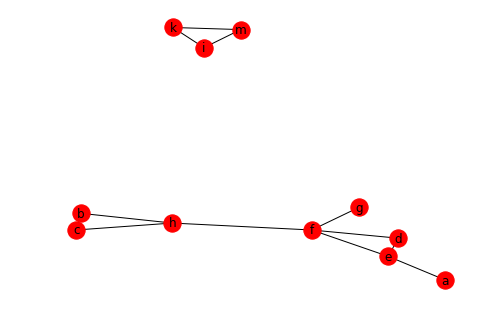

In [33]:
df2 = pd.read_csv("toy_network_2.csv",sep=";")
Graphtype = nx.Graph()
Gund2 = nx.from_pandas_edgelist(df2,source="Origin",target="Destination",edge_attr=None,  create_using=Graphtype)
nx.draw(Gund2,with_labels=True)

In the above situation we have 2 components of respectively 8 and 3 nodes. The function to check connectivity in a network is nx.is_connected

In [34]:
nx.is_connected(Gund2)

False

Moreover we can extract the components of the network and the nodes there are part of , using the function nx.connected_components

In [84]:
comps=sorted(nx.connected_components(Gund2),key=len,reverse=True)
comps

[{'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}, {'i', 'k', 'm'}]


In the case of a directed network, the components are distinguished into weakly and strongly connected: the former are the connected components of the same undirected network, while the latter are subgroups of nodes in which there is at least one directed path linking each pair of nodes.

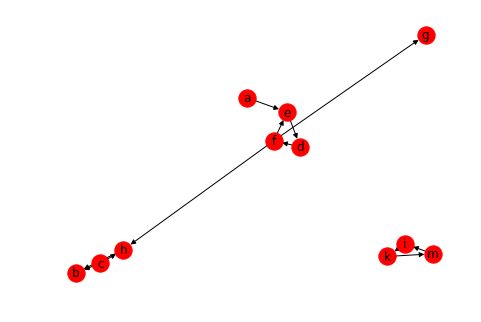

In [35]:
Graphtype2 = nx.DiGraph()
Gdir2 = nx.from_pandas_edgelist(df2,source="Origin",target="Destination",edge_attr=None,  create_using=Graphtype2)
nx.draw(Gdir2,with_labels=True)

In this case there are 2 weak components as in the case before. 


In [36]:
list(nx.weakly_connected_components(Gdir2))

[{'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}, {'i', 'k', 'm'}]

The triangle  $ikm$ is a strong component as the triangle $def$. In the triangle $cbh$, the direction of the links is not the right one and not all the nodes can be reached by the other , so it's not a strong component, although the nodes are connected. However  since the other nodes are not part of a loop following the direction of the links , they are strong_component _per se_. We can define the set of nodes  that could reach a strong component (_in-component_) that in our case is $a$, and those who can be reached by strong component $(g,h,b)$ (_out-component_)

In [37]:
list(nx.strongly_connected_components(Gdir2))

[{'b'}, {'h'}, {'g'}, {'d', 'e', 'f'}, {'a'}, {'c'}, {'i', 'k', 'm'}]

## Assignement

In the folder 1_Data you will find 6 csv files representing the network edgelist (Network_1.....6.csv)
All the networks are undirected and unweighted except Network_3 (oriented and weighted) and Network_6 (oriented)

Divided in 2 groups , analyse the networks. For each network describe  the gloabl measures and identify 5 nodes for which the centrality measures are the highest. What are the differences among the networks? 

If you have the possibility try to plot the networks using gephi

You can  present your results on  power point 

    -Group A: Network_1, Network_2, Network_3
    -Group B: Network_4, Network_5, Network_6


# Second Day

## Degree Distribution
In the previous lecture we have a considered some small toy-models.  The fact of being small helped us to represent  graphically but also to srudy the structure  and see _who-is-contact-with-whom_. However, nowadays , social and comunication networks include several thosusands of nodes making difficult to understand the relations.

To sudy the  properties of a networks, we need a statistical approach: we study how centality measures are distributed among nodes. The statistical distribution tells us how many nodes  have a specific value ( or a value in a definite interval if continous). The idea of distribution is not far from that of histogram: the height of the bar corresponds to the  count of observations (nodes)having a specific value . In the figure belwo we show the histogram fro the degree in our toy model. If we normalize to the size of the network, we estimate the relative frequency. For large values of observation the frequency tend to the probability  $p_k$ that is the  the probability that a randomly selected node has degree k

Usually when provided with real network data , we aim to estimate the degree distribution and from this understand which class  belongs though its fitting. Depending if the distribution is heterogeneous or not the property fo the network would be quite different
 

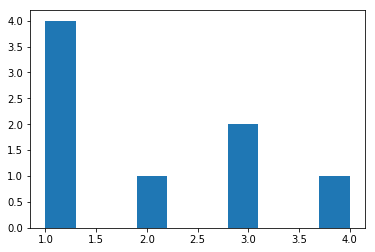

In [184]:
def plot_degree_dist(G,density):
    degrees = [G.degree(n) for n in G.nodes()]
   
    if density=="density":
        #weights = np.ones_like(degrees)/float(len(degrees))
        #pl.hist(degrees, weights=weights)
        sns.distplot(degrees)
        pl.title("L={}".format(G.number_of_edges()))
        pl.xlim(1, max(degrees)+10)
    else:
        pl.hist(degrees)
    pl.show()

plot_degree_dist(Gund,"No")

The degree distribution is the basis of many network-related phenomena, from resilience to virus dissemination. Indeed, depending on pk a network is described as a random network (or Erdos Renyi) or a scale-free network. The latter is a very common type of network in the real world and is characterised by heavy tails related to the presence of hubs, nodes with much higher k than the majority of other nodes, which is interesting from an epidemiological point of view as diseases spread more rapidly in this type of network (Dubé et al. 2009; Barabási 2015). 

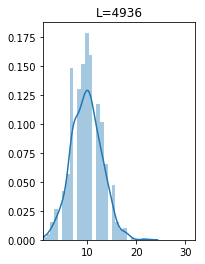

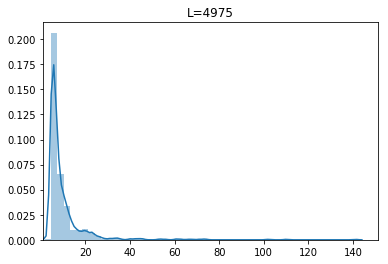

In [185]:

pl.subplot(1, 2, 2)
G1 = nx.erdos_renyi_graph(1000, 0.01)
plot_degree_dist(G1,"density")

pl.subplot(1, 1, 1)
G2 = nx.barabasi_albert_graph(1000, 5)
plot_degree_dist(G2,"density")


While in the first case  tthe support of the degree distribution is limited and  peaked around a central point , in the second case the distribution span several order of magnitude and  there is no peak.In the second case since the cumulative distribution spans several ordr of magnitude, we say that the network has a heavy tail.  Heavy tail distributions display a large level  of heterogeneity   with a lot of nodes with few links, and few nodes with a lot of links , called _hubs_, that have a prominent role. Since  the distribution is not peaked and encompass several order of magnitued the average  degree by itself is not represenatitive for discribing the characteristics of the network.

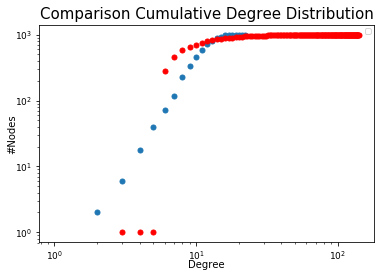

In [196]:
def degree_distribution_comparison(g, g1, title):
    # get the degree histogram
    hist = nx.degree_histogram(g)
    
    hist.reverse()
    cum_hist = list(np.cumsum(hist))
    cum_hist.reverse()
    
    
    hist1 = nx.degree_histogram(g1)
    hist1.reverse()
    cum_hist1 = list(np.cumsum(hist1))
    cum_hist1.reverse()
    pl.plot(range(0, len(cum_hist)), cum_hist, ".", markersize=10)
    pl.plot(range(0, len(cum_hist1)), cum_hist1, "r.", markersize=10)
    pl.title(title, fontsize=15)
    pl.xlabel("Degree", fontsize=10, labelpad=-2)
    pl.ylabel("#Nodes", fontsize=10, labelpad=-2)
    pl.tick_params(axis='x', labelsize=9)
    pl.tick_params(axis='y', labelsize=9)
    pl.loglog()
    pl.legend(numpoints=1, loc=0, fontsize="x-small")
    pl.show()
degree_distribution_comparison(G1, G2, "Comparison Cumulative Degree Distribution")

 To  distinguish between heterogenous and fat  tail distribution for degree is to estimate theeterogeneity parmeter $\kappa$
 
 $\kappa=\frac{<k^2>}{<k>^2}$
 
For homogeneous distribution the degree distribution is similar to a Poissonian  one , center on the average degree, thus $\kappa \simeq 1$. For heavy taile distribution the varaince  scale with the size of the network and  then is much higher than 1.

The degree distribution  ,and the corresponding structure, depends on the dynamics at the base. In some cases this dynmaic can be modelled through some mathematical models. 

## Modeling Networks

### Erdos Renyi  network and randomness

We consider the historical model of random graph and network ,developed by Erdos and Renyi at the beginning of the sixties.  In this type of network link are established at random among a set of $N$ nodes.
For the development  of this model we can consider two alternative ways of describing:

    1 We consider that we have a set of $N$ nodes and with $L$ links whose ends are  selected randomly
    2 We can consider a set of $N$ nodes whose $N(N-1)/2$ possible links can be present  with probability $p$ or absent with probability $1-p$. That is equaivalent to say that  the probability that 2 nodese are connected is $p$
    
The two formulation are connected.     
In the first formulation the average degree 
$<k>=\frac{2 L}{N}$

In the second case we can immagine the probability of creating a link between 2 nodes corresponds to toss a coin with a probability $p$ of success for a number of trials $N(N-1)/2$. The average number of success (binomial distribution) is  
$<L>=\frac{1}{2}N(N-1)p$

and consequently the average degree 
$<k>=\frac{2 <L>}{N}=(N-1)p\simeq N p$
for large N the two formulations are equivalent

Real-networks are mostly characterized by a finite degree , so we can redefine $p$ in such a way that also for a infinte the degree  remains finite

$p=\frac{ <k>}{N-1}\simeq \frac{ <k>}{N}$. In this case we note that the probability $p$ of creating a link and the density of a network $d$. 

To estimate the degree distribution we consider that in a network  with probability $p$ the probability of finding a  node of degree $k$ is equal to the probability that on $N-1$ trials $k$ will be successfull and $N-1-k$ unsuccessfull  (binomial distribution)

$$
P(k)=\left\(
    \begin{array}\\
        N-1\\
       k
    \end{array}
\right\)p^k(1-p)^{N-1-k}
$$

In the limit $N$ goes to infinite while $<k>$ remains constant the binomial distribution can be approximated by a Poissonain one 

$$
P(k)=e^{-<k>}\frac{<k>^k}{k!}
$$

Some characteristics:
    
    - The distribution is peaked around $<k>$, with an exponential decay for large k, allowing small degree fluctuations
    
    - The Poisson distribution in  does not explicitly depend on the number of nodes N. Therefore, (3.8) predicts that the degree distribution of networks of different sizes but the same average degree $<k>$ are indistinguishable from each other

    - Moreover for every node the probaility that 2 nodes of its neighborhood are connected is given by the probability $p$, consequently the average  clustering coefficient is equal to
$$ C_i=p=\frac{<k>}{N}$$
    
    that is , for fixed  average degree the clustering coefficient is decreasing  with the size of the network itself and approaches zero in the limit of an infinite network. Nevertheless , in a ER network the clustering coefficient , depending on $p$ could be very small, i.e. the number of triangles really small. Moreover the clustering coeefficient of a node is indipendent of the  nod's degree
    
     - Connectedness It's obvious that increasing the probability , or teh average degree $<k>$, more and more nodes are getting connected and a large connected component of size $N_G$ comparable to $N$ could appear. Without enetering in details Erdos-Renyi found that this a phase transition occuring  when $<k>>1$, i.e. for $<k>>1$ a finite fraction of teh network is connected. For $<k>>ln(N)$ all nodes are connected
     
    - If we consider that in average , each node in a ntwork has $<k>$ nodes at distance 1, starting from a node $s$,  at distance $n$ there will be $<k>(<k>-1)^{(n-1)}$ reachable, the diameter $l_{max}$ can be estimated as the distance at which all the nodes $N$ will be reached:
$$
<k>^{l_{max}}\simeq N \rightarrow l_{max}=\frac{log(N)}{log(<k>)}
$$
    
    This scaling is a signature of  the "small world effect", that is the distance between nodes is much smaller than the size of the network. To have an idea, let's have a look at the distance on lattice (i.e. regular network) and a ER one as in Figure below. We see that for large N the growth of the distance is much slower than for any other network. Moreover the term $log(<k>)$ indicates that the  denser the network the shortest the diameter / average distance on the network
    
   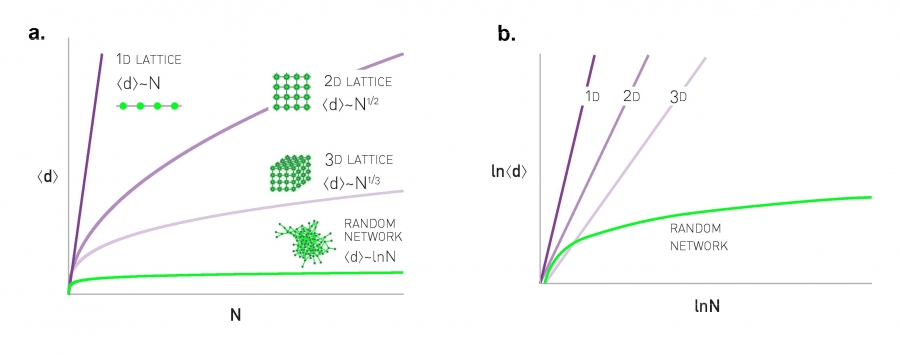
  
   Moreover considering real-world network, we notice that most of them , shows a small world effect
   
   
|Network |	N	|L|< k>| < l > |$l_{max}$|lnN/ln < k>|
|--- |---|---|---|---|---|---|
|Internet |	192,244|	609,066|	6.34|	6.98|	26|	6.58|
|WWW |	325,729|	1,497,134|	4.60|	11.27|	93	|8.31|
|Power Grid|	4,941|	6,594|	2.67|	18.99|	46	|8.66|
|Mobile-Phone Calls|	36,595|	91,826|	2.51|	11.72|	39|	11.42|
|Email|	57,194|	103,731|	1.81|	5.88|	18|	18.4|
|Science Collaboration|	23,133|	93,437|	8.08|	5.35|	15|	4.81|
|Actor Network|	702,388|	29,397,908|	83.71|	3.91|	14|	3.04|
|Citation Network|	449,673|	4,707,958|	10.43|	11.21|	42|	5.55|
|E. Coli Metabolism|	1,039|	5,802|	5.58|	2.98|	8|	4.04|
|Protein Interactions|	2,018|	2,930|	2.90|	5.61|	14|	7.14|


The small world phenomenon is strongly related to the _six degree of separation_ states that if you choose any two individuals anywhere on Earth, you will find a path of at most six acquaintances between them  The small world concept states, however, that even individuals who are on the opposite side of the globe can be connected to us via a few acquaintances. The _six degree separation_ takes the name from the Milgram experiment. Milgram chose a stock broker in Boston and a divinity student in Sharon, Massachusetts as targets. He then randomly selected residents of Wichita and Omaha, sending them a letter containing a short summary of the study’s purpose, a photograph, the name, address and information about the target person. They were asked to forward the letter to a friend, relative or acquantance who is most likely to know the target person. Eventually 64 of the 296 letters made it back, some, however, requiring close to a dozen intermediates . These completed chains allowed Milgram to determine the number of individuals required to get the letter to the target He found that the median number of intermediates was 5.2

Observing the table another important point to note ,is that the average degree  is much less than the $ln N$, so in this situation we wouldn't expect that the network should be cooneccted. However connectedness analysis shows that the network is connected

### Watts strogatz model

If we consider the  quantity $<C>/<k> ~ 1/N$, so if we fix the average degree  and we plot against $N$, we notice that in the case of real networks  the  quantity is not decreasing  with $N$ as we expected. Similarly real networks show that the clustering coefficient depend on the degree of the nodes.

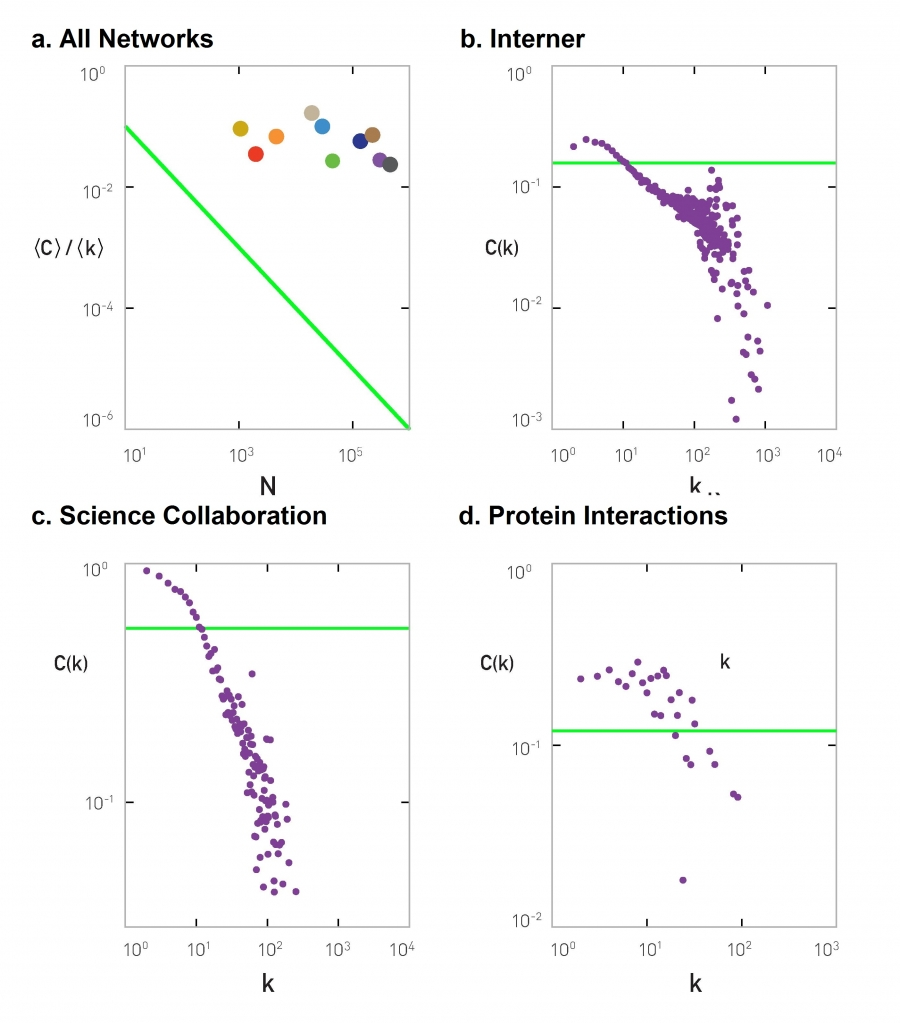

Real network appears to have larger clustering coefficient , and also distribution, and at the same   exhibit small world effect.The Erdos Renyi model doesn't capture these 2 phenomena.

To consider the 2 propoerties Watts and Strogatz propsed a new model whose network could exibit both the properties: small diameter ,and finite clustering coefficient
The model interpole between a regular lattice on a circle , with clustering coefficient 1  and $l_{max} ~N$, and a random one, with null clustering coefficient  and  diameter sacaling as $ln N$.

Starting from a regular lattice on circle , with degree $k=4$,  with a certain probability $p$ link are rewired. When p=1 the original order is lost and connection are making randomly. The degree dsitribtuion is still a binomial  like in the precedent case. For small values of p , the Clustering coefficient is almost unaffected , while the diameter rapidly decrease to small values. In fact links that initially were among close nodes, and to move from one node to the other you had to pass thorug  half the node between them , now they can connect far away nodes , does reducing distance (shortcuts). Increasing p the number of shortcuts increase till rach amamximum value other shortcut can be created but they don't affect the distance, and then reduce the clustering coefficient. For intermediate values of p , we found networks with small diameter and large clustering coefficient

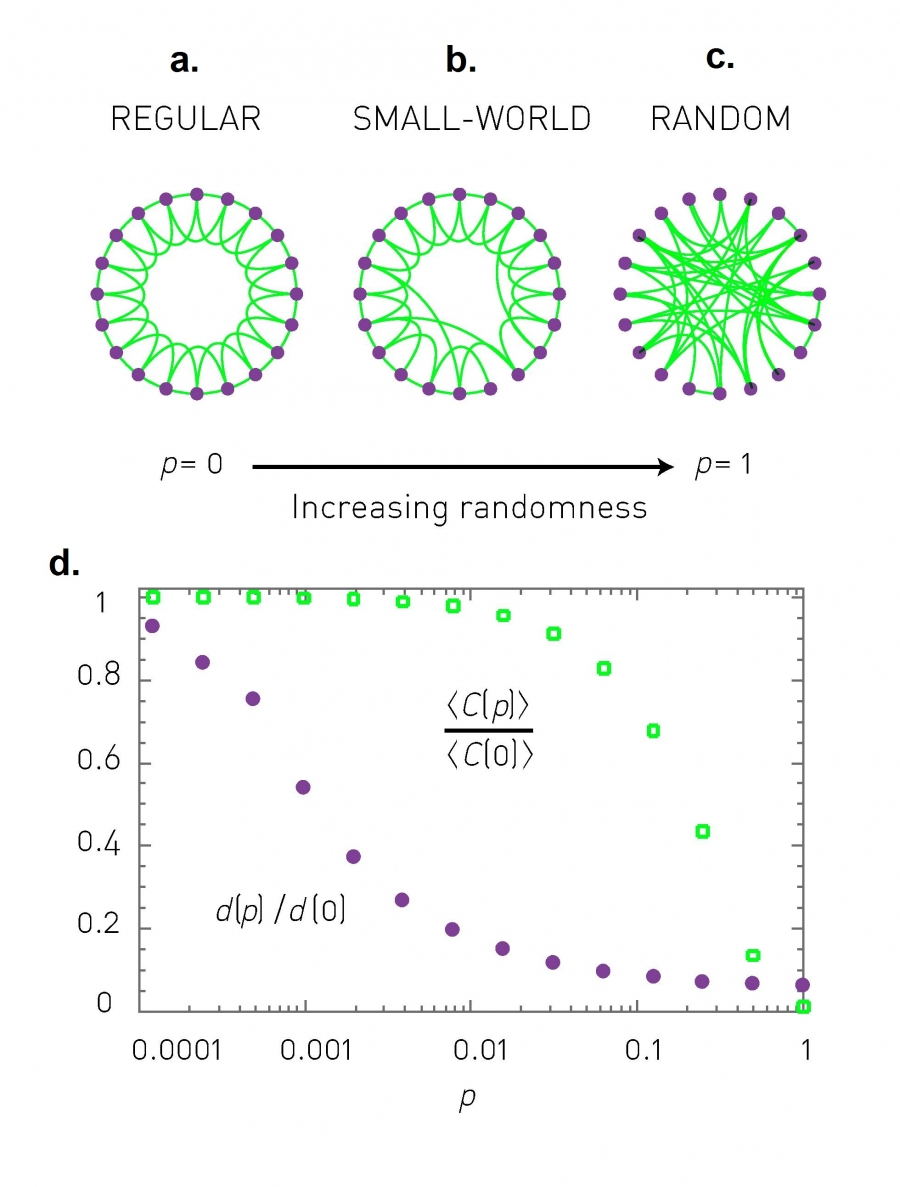

For a specific value of the triad $N , k, p$ a Watts-Strogatz model can be created using the function

In [210]:
GWS=nx.watts_strogatz_graph(1000,4, 0.1)

### Barabasi Albert model and the scale free network

Previous example  we have considered  that  links in the network were created randomly among nodes and with the same probbaility. The resulting distribution was peaked around the average value , however networks  show the presence of hub , nodes with a large number of connections ( think about charles de gaulle airport and Montpellier one and you will see the difference). To recover the hubs we need to create a mechanism taht favours certain nodes over others. This mechanim is called _preferential attachment_: we try to stick to famous people to be noted. 
In the barabasi albert  model:

    - we consider an initial set of $m_0$ nodes that are connect among them. 
    - At each time we add an ew node $i$ with $m$ links ($m<m_0$) 
    - _Preferential attachment_ :the node can create link with previously existing node  and the probability of choosing a node is based on its popularity
    
$$\Pi (ij)=\frac{k_j}{\sum_k k_k}$$
 
    In this way older nodes that were already highly connected, increase their connections.
    - The operation is repeated till the number $N$ of desired nodes have been reached
    
The resulting degree distribution can be written has 

$$ P(k)= Ck^{-\gamma}$$

where $C$ is a noramlizing constant and $\gamma $ is a positive constant, depeneding on $m$.
 The degree distribution is called a power-law or scale free


This model was firstly introduce by Barasi Albert to expalin the skewness of the degree distribution of internet finding an exponent $\gamma=3$

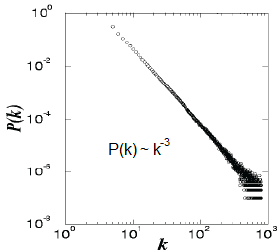


The Barabasi Albert  network can be created using the function networkx ,defining the sie of the network chosen and the number of new links created at each time:


In [209]:
GBA=nx.barabasi_albert_graph(2000,4)

The main difference  between Erdos-Renyi model  and scale free networks is in the tail . In the previous case  ,the majority of the degree are concentrated around the average  value 
If we considere an Erdos Renyi  and Barabasi albert  network with the same  average degree
  
     - For small k the power law is above the Poisson function, indicating tha t a scale-free network has a large number of small degree nodes, most of which are absent in a random network.
    - For k in the vicinity of $<k>$ the Poisson distribution is above the power law, indicating that in a random network there is an excess of nodes with degree $k=<k>$.
    - For large k the power law is again above the Poisson curve. The difference is particularly visible if we show pk on a log-log plot, indicating that the probability of observing a high-degree node, or hub, is several orders of magnitude higher in a scale-free than in a random network.

![powerlawcomp.jpeg](attachment:powerlawcomp.jpeg)

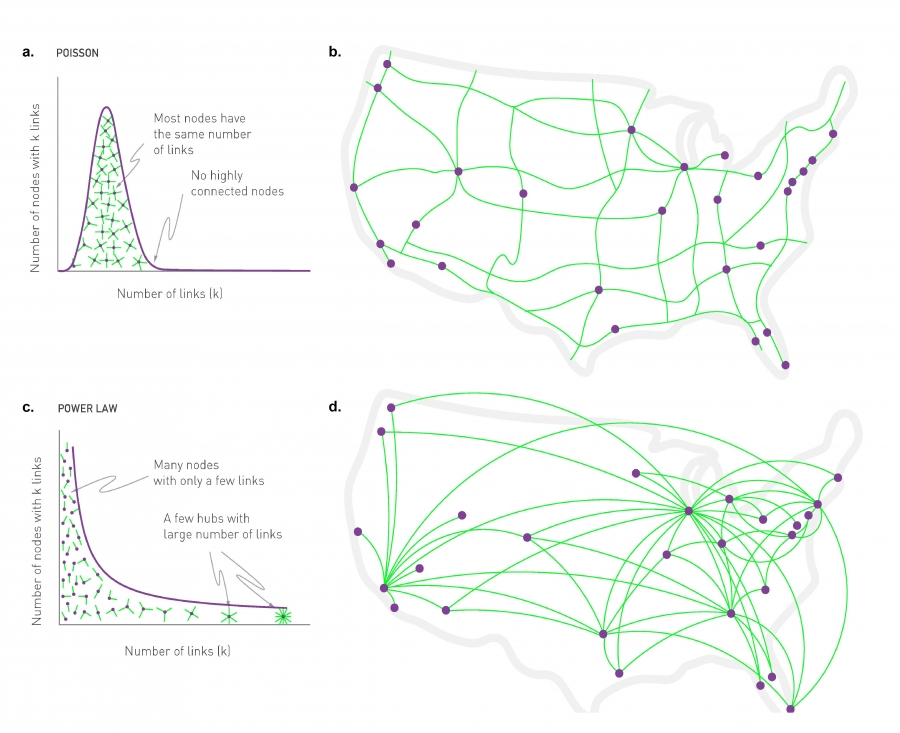


To estimate the degree of the hubs for the power-law  degree distribution we should consider that the probabilty of having a node to have a degree larger than $k_{max}$ to be 1/N
This brings to the conclusion

$$k_{max}=k_{min}N^{\frac{1}{\gamma-1}}$$

We notice that compared to the poissonian case , the size of the hubs grows with the size of  the network , whilst in the Poissonina case the largest value could be aorun $lnN$

The main diffence  between ER and BA modle resides in the shapes and heavy tail of the network. 

In the ER most of the nodes are around the average  degree in a range $[<k>-<k>^{1/2};<k>+<k>^{1/2}]$ because of this the knwolegde of the average degree provide a scales to the network itself. Moreover all the moments of the  distribution are  finite

In the Barabasi Albert model the moments have a strongly dependence on the the size of the network itself

$$< k^n>=\int k^n P(k) = \frac{k_{max}^{n-\gamma+1}}{n-\gamma+1} -Q \simeq \frac{N^{\frac{n}{\gamma-1}-1}}{n-\gamma+1}_Q$$

For a network with a power-law degree distribution with $\gamma < 3$ the first moment is finite but the second moment is infinite. The divergence of $<k^2>$  for large N indicates that the fluctuations around the average can be arbitrary large. This means that when we randomly choose a node, we do not know what to expect: The selected node’s degree could be tiny or arbitrarily large. Hence networks with $\gamma < 3$ do not have a meaningful internal scale, but are “scale-free”.In summary, the scale-free name captures the lack of an internal scale, a consequence of the fact that nodes with widely different degrees coexist in the same network.

Some properties of  scale free network:

    - The coefficinet gamma , has an effect on the  values of the momenta. Till $n> \gamma-1$ the moments are  diverging as the size of the network increases . However this  depend on the momentum chosen  and the exponent $ \gamma$. The figure belows shows the  behavior of the first 2 moments and the distances of the network. We notice that:
         - $\gamma >3$ the  networkis a small-world one , with finite momenta. and become difficult to distinguish from  a random one
         - $2<\gamma <3$ the  network becomes a ultra-small-world one , with divergence of the second momentum. the fraction of nodes connected to the hubs is $N^{-\frac{\gamma-2}{\gamma-1}}$
         - $\gamma <2$ the fraction of links attached to the hub scales with $N$, i.e. a largest fraction of nodes are connected to the hub itself thus shrinking the network itself
    
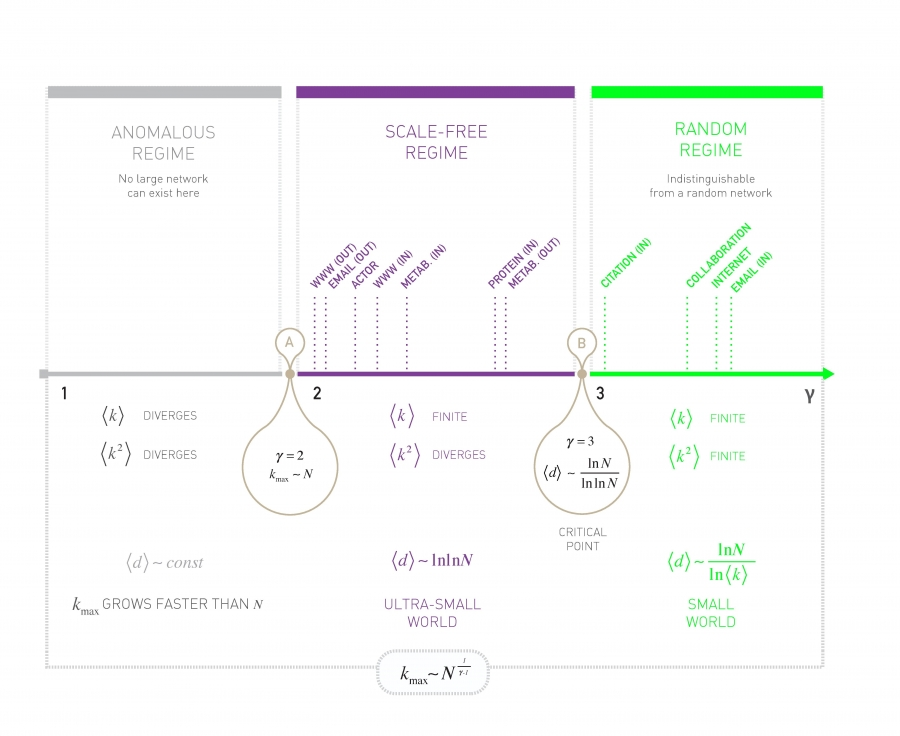 

        - Closeness to hubs. If in general  in anetwork , friends have higher number of friends , this is particularly true for scale -free network. However , the presence of hubs increase the perception and it's higher the probability of being connected to the hubs directly, or almost.  As we will see in the next section , vaccinating hubs could be effectively in avoiding the spread of disease. However sometimes is difficult to identify a hub. An approach could be to extract randomly a node , and  vaccinate  randomly one of its neighbors , that most likely is going to be a hub.  

Before concluding the  session a remark on plotting degree distribution. Because of the power law distribtuion , to  estimate the coefficnt $\gamma$ would be idela to plot the degree distribution in a log-log plot. However using a linear binning , taht is  a bin of size one , (to estimate  the number of ndoes with rpecisely degree k) would make the interpretation difficult , since for large $k$ few nodes will be present and the  distribution  would present a plateau. Away  to avoid this is to use a log-binning , that  is create bins of increasing width $b^n$, so that in $n$ bins tharer will be the nodes with degree  between $b^n $ and $b^{n+1}$.
The below function shows how to do it:

In [276]:
def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35):

  
   


    
    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    min_y = np.log10(min(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    widths = (bins[1:] - bins[:-1])
    ybins = np.logspace(min_y,max_base,num=bin_count)
    heigths = (bins[1:] - bins[:-1])
    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.values())[0]/widths) # / np.histogram(counter_dict.keys(),bins)[0])
    bin_means_x = (np.histogram(counter_dict.keys(),bins,weights=counter_dict.keys())[0] / heigths ) #  np.histogram(counter_dict.keys(),bins)[0])

    return bin_means_x.tolist(),bin_means_y.tolist()

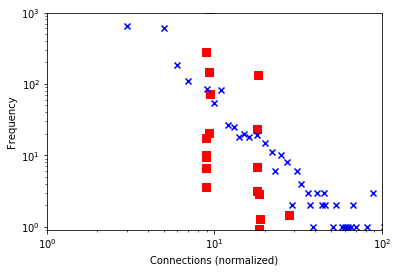

In [280]:
from collections import Counter
ba_c = nx.degree_centrality(GBA)
ba_c = {k:int(v*(len(GBA)-1)) for k,v in ba_c.iteritems()}
ba_c2 = dict(Counter(ba_c.values()))#[GBA.degree(n) for n in GBA.nodes()]#


ba_x,ba_y = log_binning(ba_c2,50)

pl.xscale('log')
pl.yscale('log')
pl.scatter(ba_x,ba_y,c='r',marker='s',s=50)
pl.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
pl.xlim((1e0,1e2))
pl.ylim((.9,1e3))
pl.xlabel('Connections (normalized)')
pl.ylabel('Frequency')
pl.show()

/Users/apolloni/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
/Users/apolloni/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


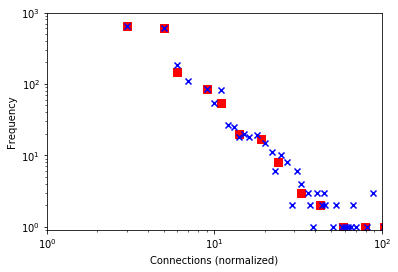

In [279]:
max_x = np.log10(max(ba_c2.keys()))
max_y = np.log10(max(ba_c2.values()))
max_base = max([max_x,max_y])
min_x = np.log10(min(drop_zeros(ba_c2.keys())))

bins = np.logspace(min_x,max_base,num=20)
widths = (bins[1:] - bins[:-1])
bin_means_y = (np.histogram(ba_c2.keys(),bins,weights=ba_c2.values())[0] / np.histogram(ba_c2.keys(),bins)[0])
bin_means_x = (np.histogram(ba_c2.keys(),bins,weights=ba_c2.keys())[0] / np.histogram(ba_c2.keys(),bins)[0])

pl.xscale('log')
pl.yscale('log')
pl.scatter(bin_means_x.tolist(),bin_means_y.tolist(),c='r',marker='s',s=50)
pl.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')
pl.xlim((1e0,1e2))
pl.ylim((.9,1e3))
pl.xlabel('Connections (normalized)')
pl.ylabel('Frequency')
pl.show()

#### Other types of preferential attachment

Previous model has consider linear preferential attachment Howevere  other two models acan be considered:
 
    -) Non linear preferential attachment 
    $$\Pi (ij)=\frac{k_j^\alpha}{\sum_k k_k^\alpha}$$
    where for $\alpha<1$ hubs disappear
    where for $\alpha>1$ hubsaccumulate links faster than younger nodes and in the $\alpha>2$ a single node can take all the connections (_winner takes all effect_)
    
    -) Fitness model/ In this case node $i$ has a fitness value assigned $\eta_i$ that could attract links. This fitness node could corresponds to some propoerties of the node not related to the structure. 
    $$\Pi (ij)=\frac{\eta_j k_j}{\sum_k\eta_k k_k}$$
    If values of fitness  are bounded  there re multiple hubs; fitness equilibrate  age in the network

## Robustness and resilience of the networks

A network is said to be resilient if following the failing of some nodes it continues to maintian the fuanction. If you think a power network , you can think some power stations going down , can electricity still flow or not? 
The answer relies  in the position of the nodes in the network , but also in the structure of the network itself.

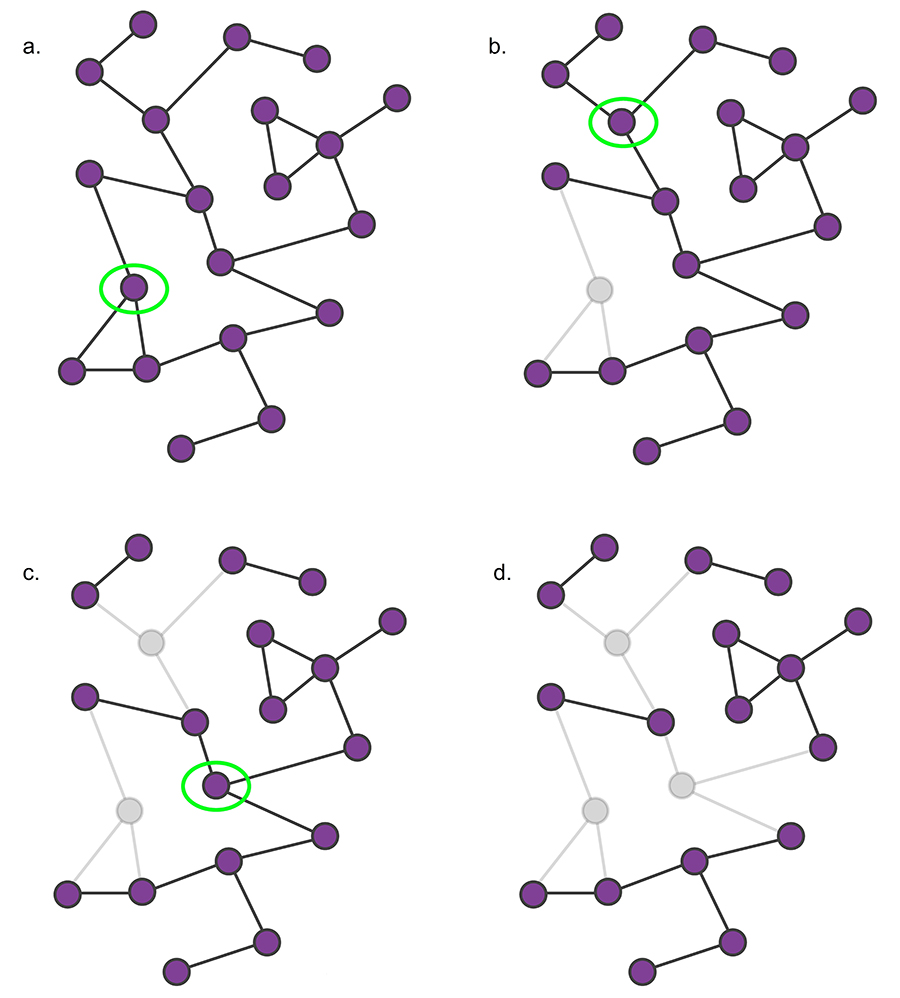


In network theory we distinguish between error and  targeted attack.
    
    Error: is a random failure of a node
    Targeted attack: nodes with specific characteristics are removed from the network (pruning)
    
 In order to simulate  the  2 phenomena:
     
     Selected nodes are removed  together with all its links 
     
     The connectedness of the network is checked. 
     
         If network is still connected  we remove another node
         Otherwise we estimate the size of the largest component as the number of nodes over the total size
    
    We remove another node
    
The effect of failur and random attack varies according to the degree distibution
    
    In erdos Renyi netwok tehre is no differnce between  random failurae and targeted since nodes have almost the same degree and none have a central role
    
    In the case of scale free network: Random attacks are most likely to select outliers (nodes with low degree), whilst hubs are less likely to be touched; however targeted attack based on degree will hit most likely hubs , disconnetting almost immediately the network. 
    
This last point is at the base of targeted vaccination: in this case  vaccinating  a node corresponds to vacciante  an individual and stop the cahin of transmission to other nodes , thus confining the disease in one of the sub-networks.

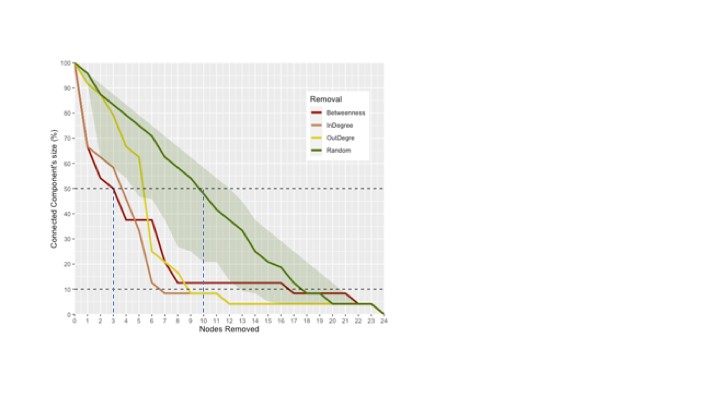

To estimate the number of nodes to be removed by random failure we can consider the Molloy-Reed criterion: For a network to have a giant component, most nodes that belong to it must be connected to at least two other nodes Therefore, the average degree ki of a randomly chosen node i that is part of the giant component should be at least 2. Given the probability that a node i with degree  $k_i$ is connected to  a node $j$ in the giant component 

$$ \sum_i k_i P(k_i, i is connected to j)=2$$ 

where the preobability dipend on the  degree distribution and the probability of having a link between i and j, this condition  translates in

$$ \frac{<^2>}{<k>}>2$$ 

The fraction to remove is related to  this coefficient by the relation

$$ f_c=\frac{1}{\frac{<^2>}{<k>}-1}$$

In the case of Erdos Renyi network (using the relation between standard deviation and average value)
$$ f_c^{ER}=1- \frac{1}{<k>}$$

For scale free network , 
 
     - $\gamma>3$  the  fraction doesn't depend on the network size and  it falls apart once a finite fraction of its nodes are removed.
 
 $$ f_c=1- \frac{1}{\frac{\gamma-2}{\gamma-3}k_{min}-1}$$
 
     - $2<\gamma<3$ , $k_{max}$ increas with N and the numebr of nodes to elimeinate tend to 1 to fragment an infinite scale-free network we must remove all of its nodes.
 
 $$ f_c=1- \frac{1}{\frac{\gamma-2}{3-\gamma}k_{min}^{\gamma-2}k_{max}^{\gamma-3}-1}$$
 

## Community structures in network

Networks are caracterized by the presence of structures ; that is subet of nodes that is set of nodes that are tightly connected among  them adn the density of the set is higher than the average density of the network. . The formation of this clusters could depend on several exogeneous  factors (social , economical). The presence of communities ( i.e; tightly connected set s of nodes ) could help us in understanding how network is organized nad the function to serve: in brains communities of synapies are synchronise;in protein-protein interaction group of connected proteins are associated with a particular biological function. 
Once community are identified , we can then proceed to classify the role of nodes inside each communtiy: nodes at the center represents ccore of the cluster, whilst nodes at the border between act as  gatekeepers differnt parts of the network. 

Some definition:
    
    -) Community Is a connected  subnetwork whose internal degree (that is the number of links excahnged among memebers is higher thatn cexternal  one (links with nodes of other communities)
    -) Communities are said to have high cohesion (high nternal links) and high separation (they are poorly connected. with other communities). These properteis can be summarized in modularity of a community partition.
    -) A node in the  community can have external  degree  $k_i^{ext}=0$ , but always internal degree $k_i^{int}>0$ 
    -) The community degree is the sum of all the internal degree of a community
    $$K_c=\sum{i in C}k_i=\sum{i in C}k_i^{int}+k_i^{ext}$$
    
 One of the object of network analysis is to identifiy  community partition in the network: i.e do a partition of nodes in groups. The procedure is laways Hierarchical and ends up in group  taht are part of larger group , and could be represented in terms of dendrograms  
 
 2 algorithms can be considered  to identify communities:
 
     - __Girvan Newman Algorithm or edge betweennes__: the main assumption is that  link with highest betweenness connect  nodes in different communities (bridge). thus removing thes links we identify communities. The algorithm works i 2 repettive steps:
     
         - The link with highest  betweenness is removed
         - the betweenness is re-estimated
         
       - the first stpe is repeated till all the links are removed. At the end the network is partition ed in $N$ communities taht are part of the dendrogram
 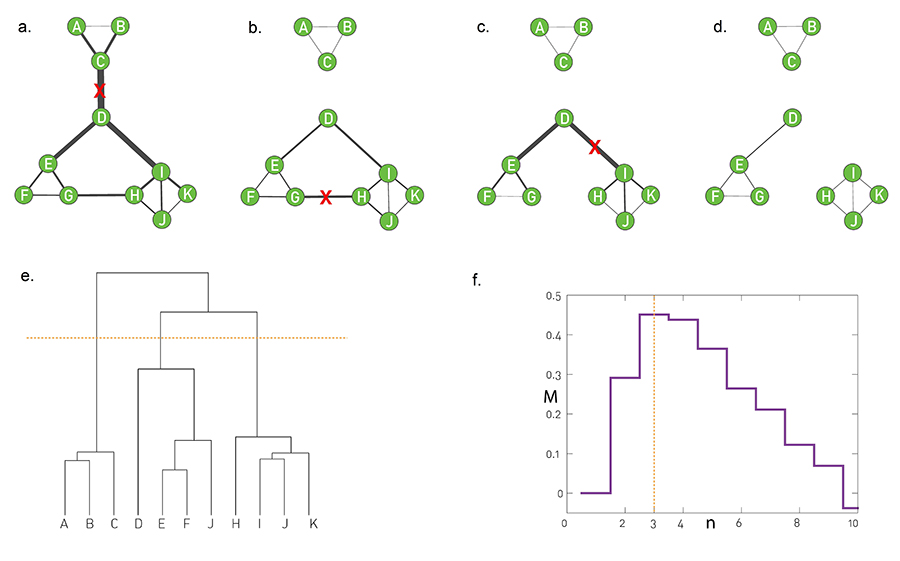     

     
     - __Modularity optimization__ Modularity is the difference between the  number of links internal to a community ($L_C$) and the ones that could be obtained in a randomized network with the same degree distribution: the higher the more the distribution is not randomly nut there are some driving forces. The objective of this algorithm is to create partition that increase  the modularity $Q$ of the network
     
     $$Q=\frac{1}{L} \sum_C\left \(L_C-\frac{k_C^2}{4L}\right \)$$
     
       where $\frac{k_C^2}{4L}$ is the probability that 2 nodes in teh commuity  are connected by chance
       The Louvain algorith  works to  merge partition and increase the  modularity of the network and communities are merged in supernodes with weighted links whose weights correspond to the number of links exchanged by teh  the nodes in the communinties.

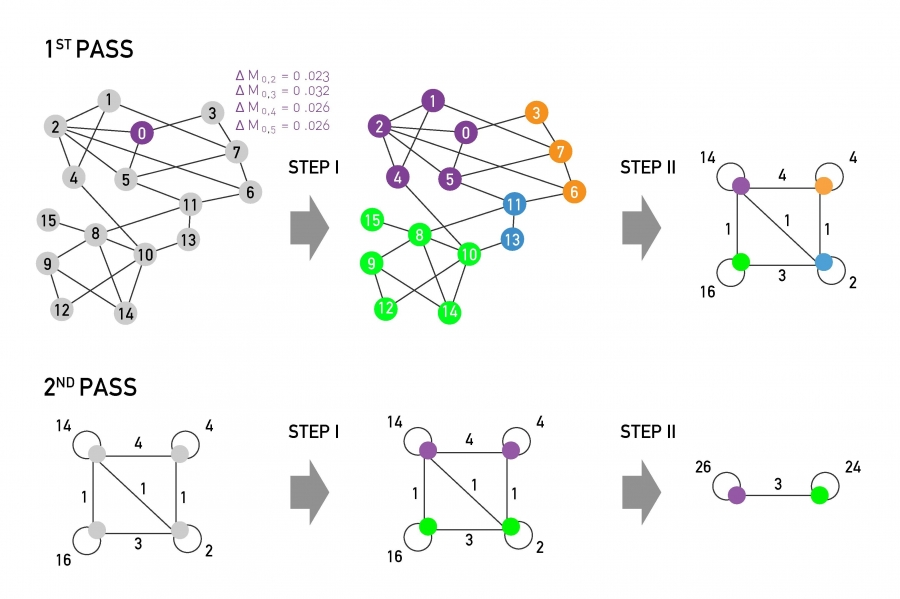

Both the algorithms produce partiitions, to compare and decide  the betst partition , and which algorithm detect more precisely the community partition the rule of thum of modularity >0.3 is used.  

The function for the Girvan_Newman:

In [281]:
partitionGN=nx.community.girvan_newman(GBA)

For the Louvain a function has not been developed yet, but for a generic modularity greedy:

In [282]:
partitionGreedy=nx.community.greedy_modularity_communities(GBA)

To estimate the modularity for a partition

In [ ]:
modularityGN=nx.community.quality.modularity(GBA,partitionGN)